<a href="https://colab.research.google.com/github/Belal-AI/Rev-Projects/blob/main/visualizing_what_convnets_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [13]:
from tensorflow.keras import backend as K

In [5]:
model=tf.keras.applications.VGG16(weights='imagenet',
              include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [6]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

THE GOAL IS TO DERVEATE THE LOSS WITH RESPECT TO THE MODEL INPUT
- to doing it you need to create it loss and its gradints
- so firstly get the model layer that you want to get

In [48]:
def preprocess(x):
  x-=x.mean()
  x/=(x.std()+ 1e-5)
  x+=.5
  x=np.clip(x,0,1)
  return x

In [114]:
def generate_patterm(kernal_name,kernal_index,size=150):
  layer=model.get_layer(kernal_name).output
  loss=K.mean(layer[:,:,:,kernal_index])

  grads = K.gradients(loss, model.input)[0]
  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
  loss_and_grad_calc=K.function([model.input],[loss,grads])
  iterate = K.function([model.input], [loss, grads])

  input_img_data = np.random.random((1, size, size, 3)) * 20 + 128
  for i in range(40):
    losses,grads=loss_and_grad_calc(input_img_data)
    input_img_data+=grads*1

  return preprocess(input_img_data[0])





In [115]:
img=generate_patterm('block3_conv1',0)

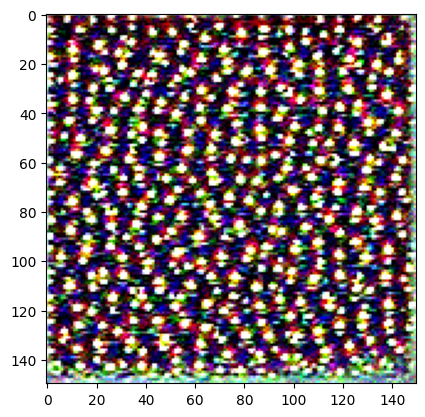

In [116]:
plt.imshow(img)

In [117]:
img.shape

(150, 150, 3)

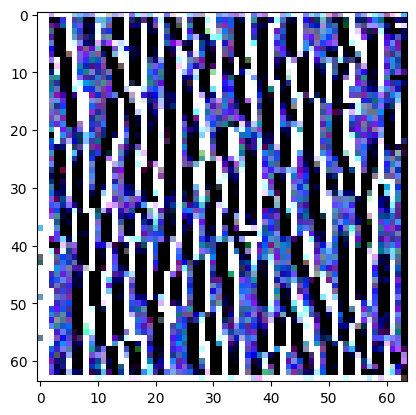

In [118]:
for layer_name in ['block1_conv1']:
    size = 64
    margin = 5

    # This a empty (black) image where we will store our results.
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

    for i in range(8):  # iterate over the rows of our results grid
        for j in range(8):  # iterate over the columns of our results grid
            # Generate the pattern for filter `i + (j * 8)` in `layer_name`
            filter_img = generate_patterm(layer_name, i + (j * 8), size=size)
            plt.imshow(filter_img)


In [119]:
lista=[]
for layer_name in ['block1_conv1']:

    for i in range(8):  # iterate over the rows of our results grid
        for j in range(8):  # iterate over the columns of our results grid
            # Generate the pattern for filter `i + (j * 8)` in `layer_name`
            filter_img = generate_patterm(layer_name, i + (j * 8), size=size)
            lista.append(filter_img)

            # Put the result in the square `(i, j)` of the results grid


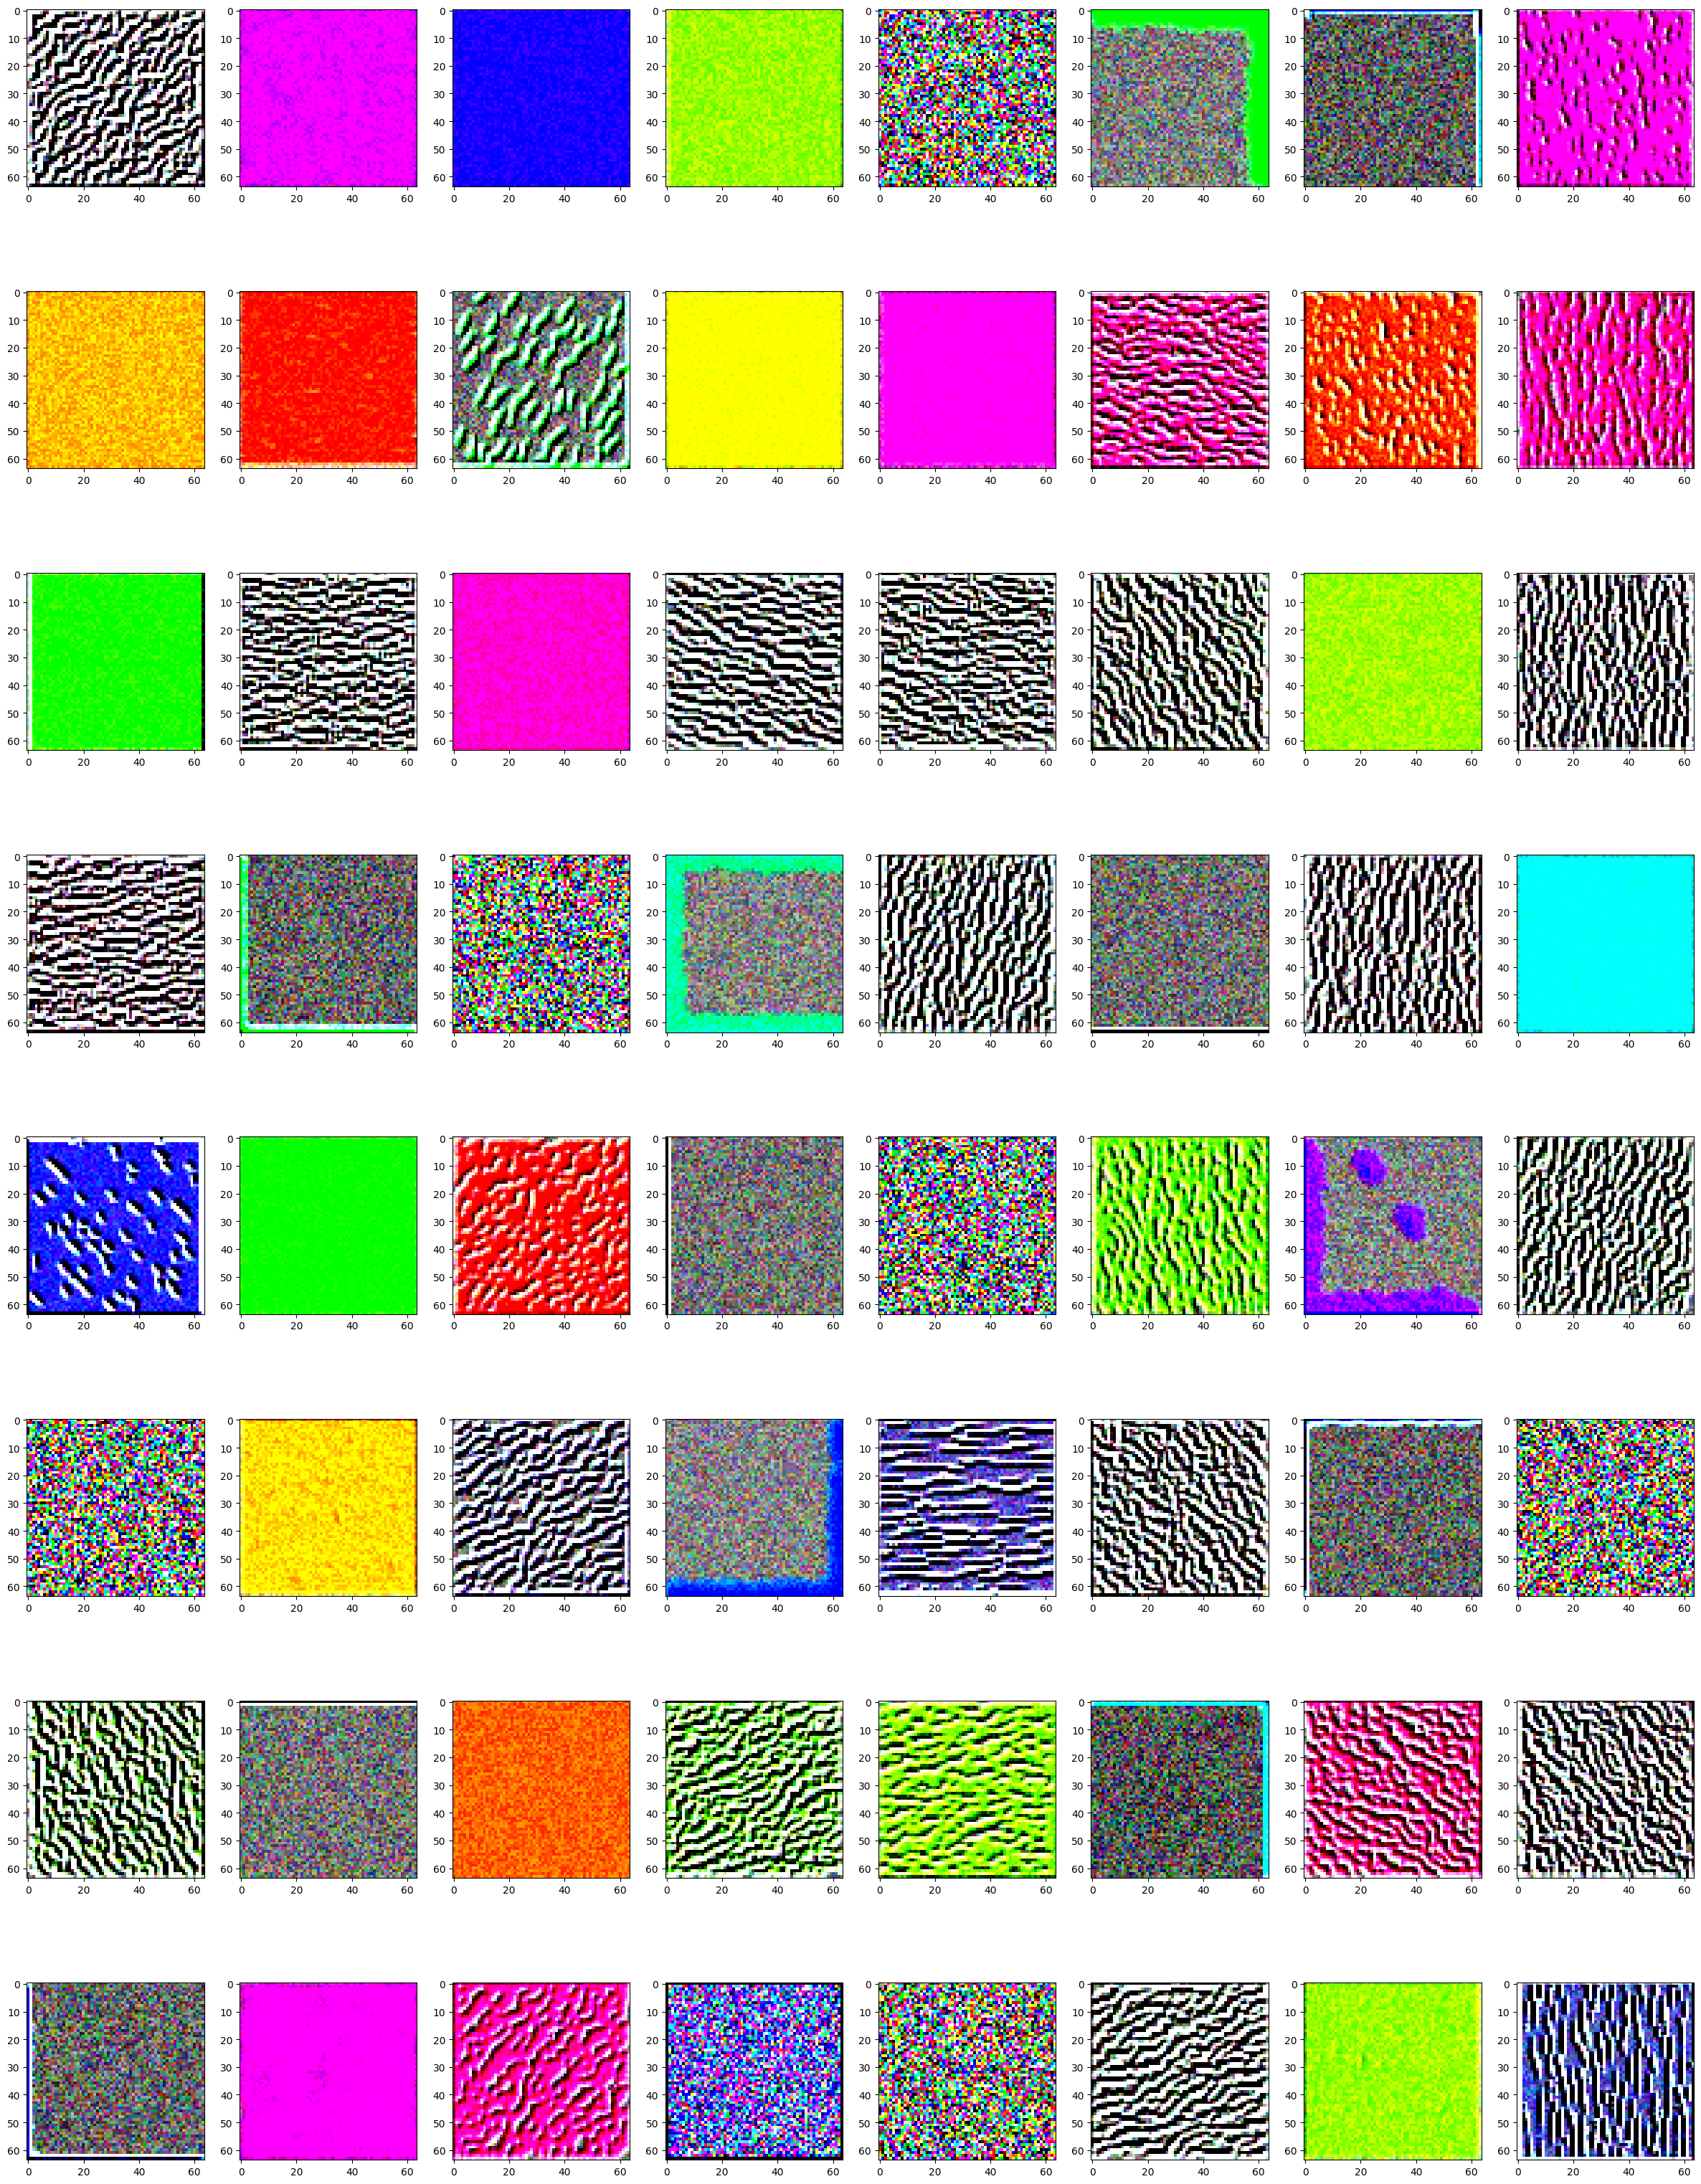

In [120]:
figs,axis=plt.subplots(8,8,figsize=(30,40))
couteri=0
for i in range(8):
  for j in range(8):
    axis[i,j].imshow(lista[couteri],cmap="viridis")
    couteri+=1

In [103]:
model=tf.keras.applications.VGG16(include_top=True, weights= "imagenet")

553467096/553467096 [==============================] - 18s 0us/step


In [106]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [141]:
def patter_kernals(layer_name,kernal_index,size=150):

  layer=model.get_layer(layer_name).output

  loss=K.mean(layer[:,:,:,kernal_index])

  grads=K.gradients(loss,model.input)[0]

  grads/=(K.sqrt(K.mean(K.square(grads)))+1e-5)

  iterat=K.function([model.input],[loss,grads])
  imginput=np.random.random((1,size,size,3)) * 30

  for i in range(40):
    loss,grads=iterat(imginput)
    imginput+=grads*1.

  return preprocess(imginput[0])






In [142]:
def preprocess(x):
  x-=x.mean()
  x/=(x.std()+.00005)
  x=np.clip(x,0,1)
  return x


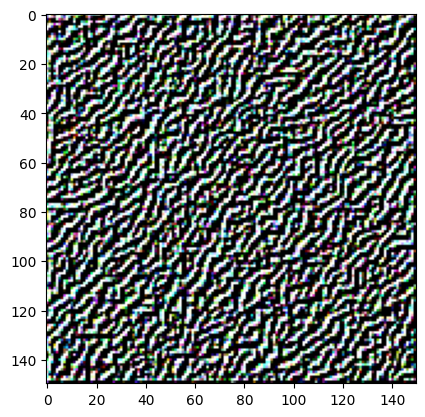

In [143]:
plt.imshow(patter_kernals('block1_conv1',0,150))

In [131]:
patter_kernals('block1_conv1',0,150).shape

(1, 150, 150, 3)

In [148]:
lista=[]
for i in ['block1_conv1']:
  for j in range(model.get_layer(i).output.shape[3]):
    lista.append(patter_kernals(i,j))


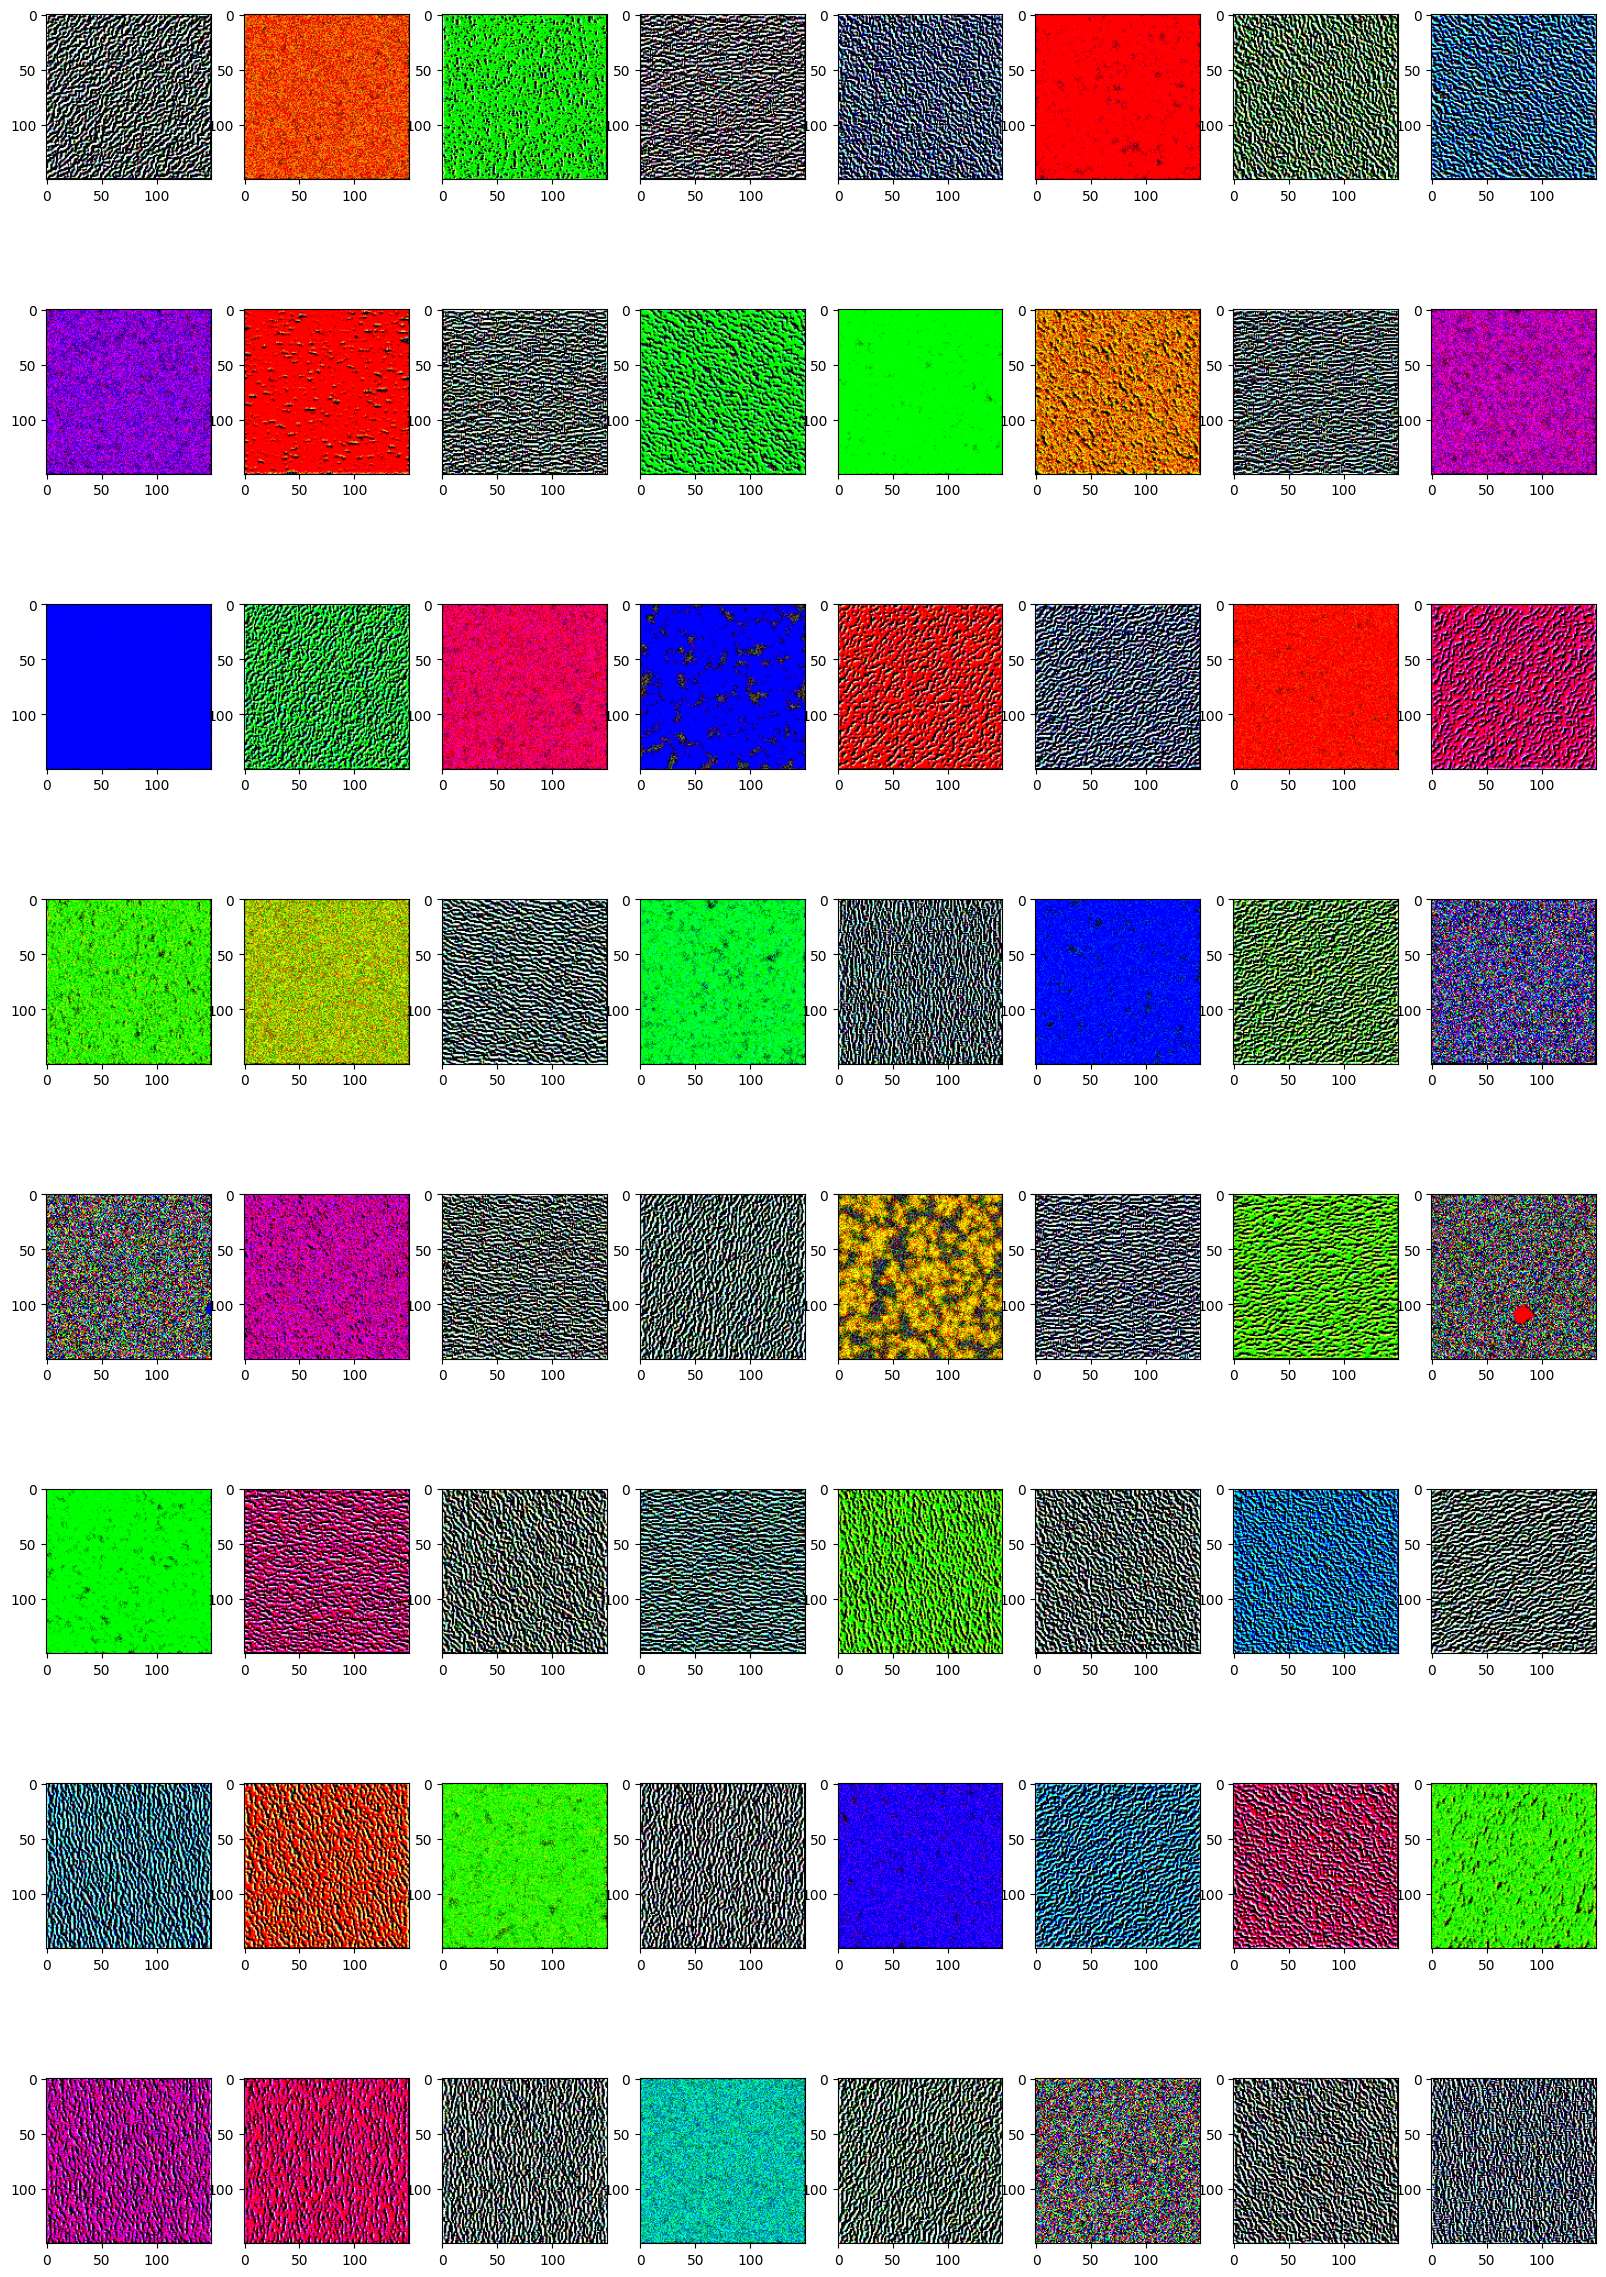

In [152]:
fig,axis=plt.subplots(8,8,figsize=(20,30))
counteri=0
for i in range(8):
  for j in range(8):
    axis[i,j].imshow(lista[counteri])
    counteri+=1



In [147]:
model.get_layer('block1_conv1').output.shape[3]

64